In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

#### Read the dataset

In [2]:
df = pd.read_csv('vehicle_data.csv')
df.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


#### Shape of the dataframe

In [3]:
df.shape
# rows=398,cols=9

(398, 9)

#### Creating copy of the dataframe

In [4]:
df1 = df.copy()
df1.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,Kilometer_per_liter
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587
3,1,8,304.0,150,3433,12.0,1970,amc rebel sst,6.802299
4,1,8,302.0,140,3449,10.5,1970,ford torino,7.227443


#### Renaming column

In [5]:
df1.rename(columns={'Kilometer_per_liter':'kpl'},inplace=True)
df1.head(3)

,origin,cylinders,displacement,horsepower,weight,acceleration,year,name,kpl
0,1,8,307.0,130,3504,12.0,1970,chevrolet chevelle malibu,7.652587
1,1,8,350.0,165,3693,11.5,1970,buick skylark 320,6.377156
2,1,8,318.0,150,3436,11.0,1970,plymouth satellite,7.652587


#### Handling null values

In [6]:
df1.isnull().sum()

origin          0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
year            0
name            0
kpl             0
dtype: int64

#### Handling Duplicates

In [7]:
df.duplicated().sum()

0

#### Checking data Types

In [8]:
df1.dtypes

origin            int64
cylinders         int64
displacement    float64
horsepower       object
weight            int64
acceleration    float64
year              int64
name             object
kpl             float64
dtype: object

#### Checking Columns for inconsistent values

In [9]:
df1['horsepower'].value_counts()

150    22
90     20
88     19
110    18
100    17
       ..
61      1
93      1
148     1
152     1
82      1
Name: horsepower, Length: 94, dtype: int64

In [1]:
# df['horsepower']= pd.to_numeric(df['horsepower'])


# #or
# #df['horsepower'] = 

In [11]:
df1['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '?', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [12]:
df1[df1['horsepower']=="?"].shape

(6, 9)

In [13]:
df1 = df1[df1['horsepower']!="?"]
df1['horsepower'].unique()

array(['130', '165', '150', '140', '198', '220', '215', '225', '190',
       '170', '160', '95', '97', '85', '88', '46', '87', '90', '113',
       '200', '210', '193', '100', '105', '175', '153', '180', '110',
       '72', '86', '70', '76', '65', '69', '60', '80', '54', '208', '155',
       '112', '92', '145', '137', '158', '167', '94', '107', '230', '49',
       '75', '91', '122', '67', '83', '78', '52', '61', '93', '148',
       '129', '96', '71', '98', '115', '53', '81', '79', '120', '152',
       '102', '108', '68', '58', '149', '89', '63', '48', '66', '139',
       '103', '125', '133', '138', '135', '142', '77', '62', '132', '84',
       '64', '74', '116', '82'], dtype=object)

In [14]:
# r = [int(i) for i in df1['horsepower'].unique() if i!='?']
# print(r)
# print(np.mean(r))
# print(np.median(r))

In [15]:
# df1['horsepower'] = df['horsepower'].replace('?','150')
# df1['horsepower'].unique()

In [16]:
# df1['horsepower'].value_counts().sort_values(ascending=False)

In [17]:
df1['horsepower'] = pd.to_numeric(df1['horsepower'])
df1.dtypes

origin            int64
cylinders         int64
displacement    float64
horsepower        int64
weight            int64
acceleration    float64
year              int64
name             object
kpl             float64
dtype: object

In [18]:
print(df1.shape)

(392, 9)


In [19]:
print(df1['name'].nunique())
print(df1['name'].unique())

301
['chevrolet chevelle malibu' 'buick skylark 320' 'plymouth satellite'
 'amc rebel sst' 'ford torino' 'ford galaxie 500' 'chevrolet impala'
 'plymouth fury iii' 'pontiac catalina' 'amc ambassador dpl'
 'dodge challenger se' "plymouth 'cuda 340" 'chevrolet monte carlo'
 'buick estate wagon (sw)' 'toyota corona mark ii' 'plymouth duster'
 'amc hornet' 'ford maverick' 'datsun pl510'
 'volkswagen 1131 deluxe sedan' 'peugeot 504' 'audi 100 ls' 'saab 99e'
 'bmw 2002' 'amc gremlin' 'ford f250' 'chevy c20' 'dodge d200' 'hi 1200d'
 'chevrolet vega 2300' 'toyota corona' 'plymouth satellite custom'
 'ford torino 500' 'amc matador' 'pontiac catalina brougham'
 'dodge monaco (sw)' 'ford country squire (sw)' 'pontiac safari (sw)'
 'amc hornet sportabout (sw)' 'chevrolet vega (sw)' 'pontiac firebird'
 'ford mustang' 'mercury capri 2000' 'opel 1900' 'peugeot 304' 'fiat 124b'
 'toyota corolla 1200' 'datsun 1200' 'volkswagen model 111'
 'plymouth cricket' 'toyota corona hardtop' 'dodge colt hardtop'


In [20]:
r1 = [i for i in df1['name'].unique() if i.startswith('to')]
print(r1)

['toyota corona mark ii', 'toyota corona', 'toyota corolla 1200', 'toyota corona hardtop', 'toyouta corona mark ii (sw)', 'toyota corolla 1600 (sw)', 'toyota carina', 'toyota mark ii', 'toyota corolla', 'toyota corolla liftback', 'toyota celica gt liftback', 'toyota corolla tercel', 'toyota corona liftback', 'toyota starlet', 'toyota tercel', 'toyota cressida', 'toyota celica gt']


In [21]:
r2 = [i for i in df1['name'].unique() if i.startswith('chev')]
print(r2)

['chevrolet chevelle malibu', 'chevrolet impala', 'chevrolet monte carlo', 'chevy c20', 'chevrolet vega 2300', 'chevrolet vega (sw)', 'chevrolet vega', 'chevrolet chevelle concours (sw)', 'chevrolet malibu', 'chevrolet caprice classic', 'chevrolet nova custom', 'chevrolet monte carlo s', 'chevrolet nova', 'chevrolet chevelle malibu classic', 'chevrolet bel air', 'chevroelt chevelle malibu', 'chevrolet monza 2+2', 'chevrolet chevette', 'chevrolet woody', 'chevy c10', 'chevrolet concours', 'chevrolet monte carlo landau', 'chevrolet malibu classic (sw)', 'chevrolet citation', 'chevrolet cavalier', 'chevrolet cavalier wagon', 'chevrolet cavalier 2-door', 'chevrolet camaro', 'chevy s-10']


In [22]:
df1.drop('name',axis=1,inplace=True)
df1.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,kpl
0,1,8,307.0,130,3504,12.0,1970,7.652587
1,1,8,350.0,165,3693,11.5,1970,6.377156
2,1,8,318.0,150,3436,11.0,1970,7.652587
3,1,8,304.0,150,3433,12.0,1970,6.802299
4,1,8,302.0,140,3449,10.5,1970,7.227443


## EDA

### 1) Univarite Data Analysis

In [23]:
df1.describe()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,kpl
count,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000,392.000000
mean,1.576531,5.471939,194.411990,104.469388,2977.584184,15.541327,1975.979592,9.967885
std,0.805518,1.705783,104.644004,38.491160,849.402560,2.758864,3.683737,3.318250
min,1.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1970.000000,3.826293
25%,1.000000,4.000000,105.000000,75.000000,2225.250000,13.775000,1973.000000,7.227443
50%,1.000000,4.000000,151.000000,93.500000,2803.500000,15.500000,1976.000000,9.672019
75%,2.000000,8.000000,275.750000,126.000000,3614.750000,17.025000,1979.000000,12.329168
max,3.000000,8.000000,455.000000,230.000000,5140.000000,24.800000,1982.000000,19.811697


In [24]:
df1.shape

(392, 8)

In [25]:
for i in ('origin','cylinders'):
    print(df1[i].value_counts())

1    245
3     79
2     68
Name: origin, dtype: int64
4    199
8    103
6     83
3      4
5      3
Name: cylinders, dtype: int64


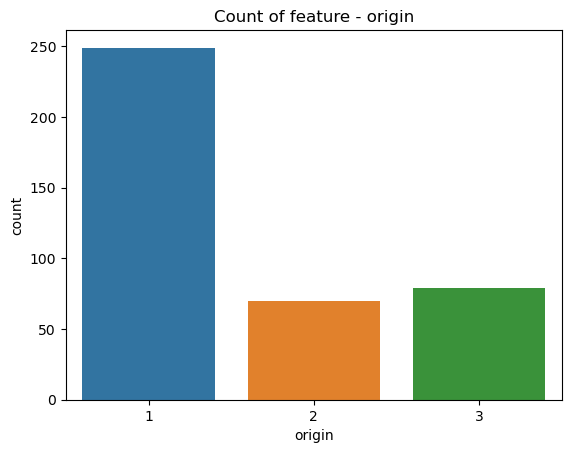

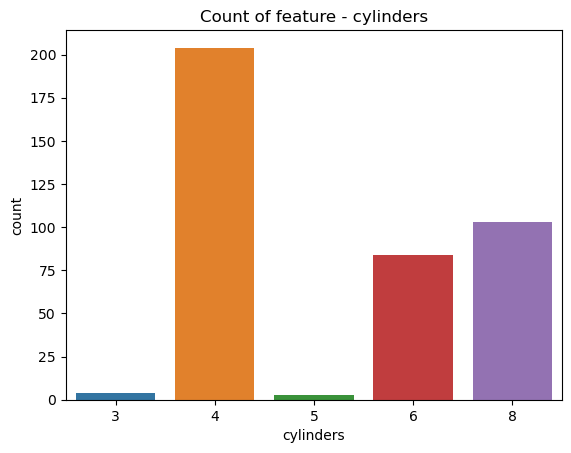

In [26]:
for i in ('origin','cylinders'):
    sns.countplot(x=df[i])
    plt.title(f'Count of feature - {i}')
    plt.show()

#### Inference
1) Most of the vehicles have origin country 1<br>
2) Most of the vehicles have 4 cylinders<br>

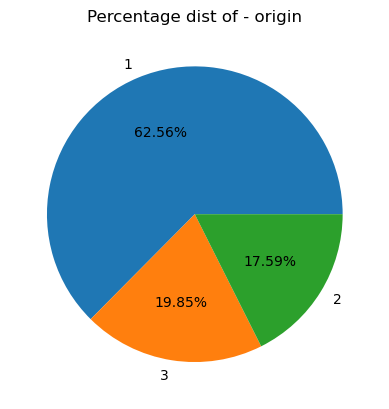

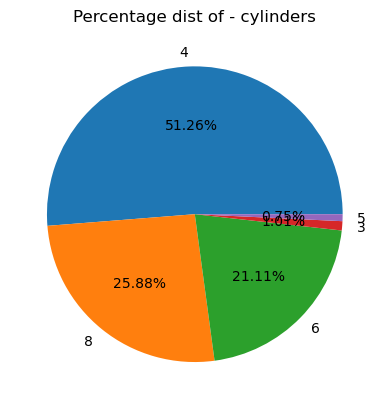

In [27]:
for i in ('origin','cylinders'):
    r = df[i].value_counts()
    plt.pie(x=r.values,labels=r.index,autopct='%.2f%%')
    plt.title(f'Percentage dist of - {i}')
    plt.show()

#### Inference
1) More than 95% of vehicles have either 4, 6 or 8 cylinder<br>

#### Unique Counts

In [28]:
df1.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,kpl
0,1,8,307.0,130,3504,12.0,1970,7.652587
1,1,8,350.0,165,3693,11.5,1970,6.377156
2,1,8,318.0,150,3436,11.0,1970,7.652587
3,1,8,304.0,150,3433,12.0,1970,6.802299
4,1,8,302.0,140,3449,10.5,1970,7.227443


In [29]:
print(df.columns)
df.columns[[0,1,2,3,5,6]]

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'name', 'Kilometer_per_liter'],
      dtype='object')


Index(['origin', 'cylinders', 'displacement', 'horsepower', 'acceleration',
       'year'],
      dtype='object')

In [30]:
for i in df.columns[[0,1,2,3,5,6]]:
    print(f'{i} -  {df[i].nunique()}')

origin -  3
cylinders -  5
displacement -  82
horsepower -  94
acceleration -  95
year -  13


In [31]:
num_cols = df1.dtypes[df1.dtypes!='object'].index
num_cols

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'kpl'],
      dtype='object')

#### Boxplots

In [32]:
df1.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'kpl'],
      dtype='object')

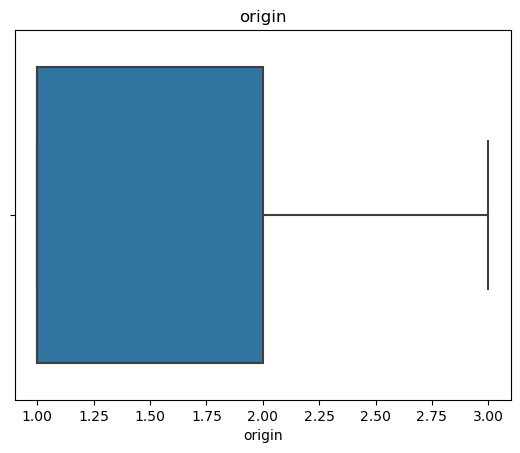

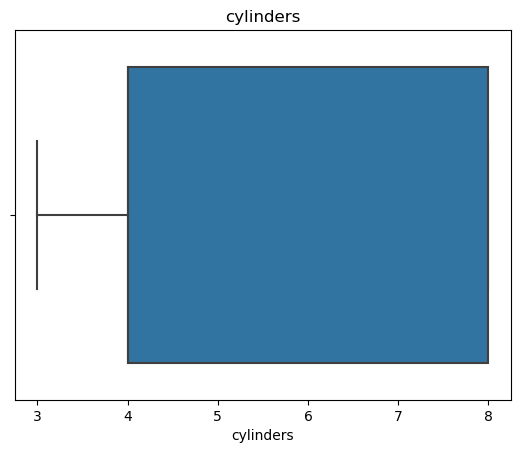

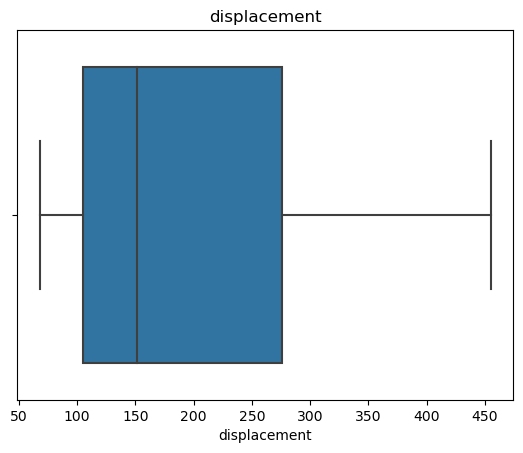

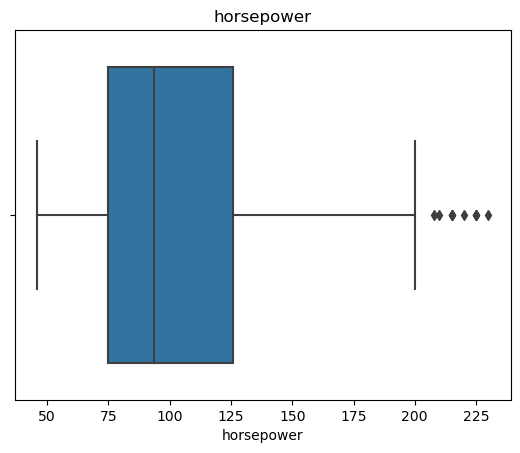

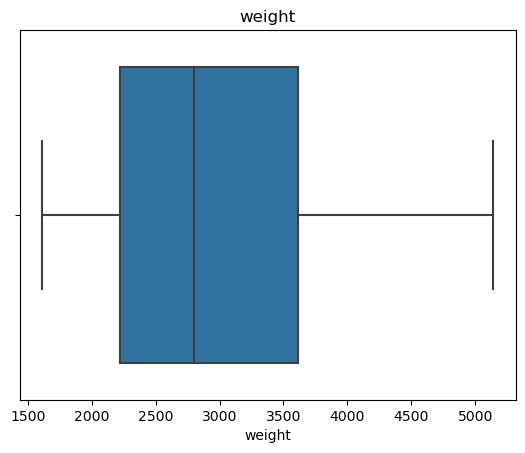

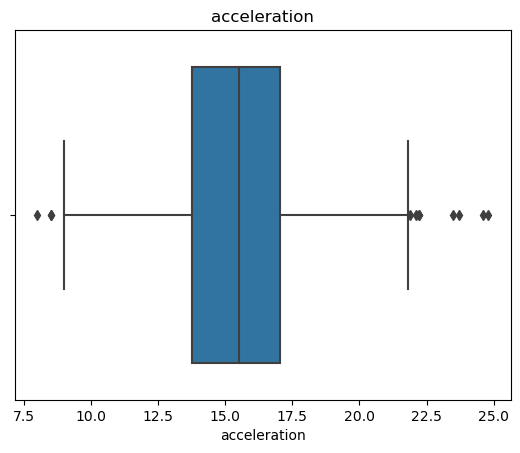

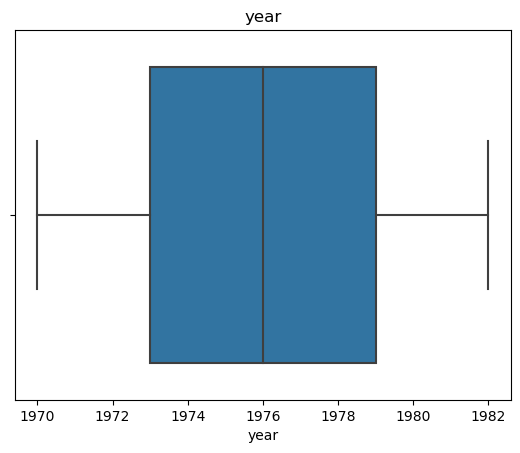

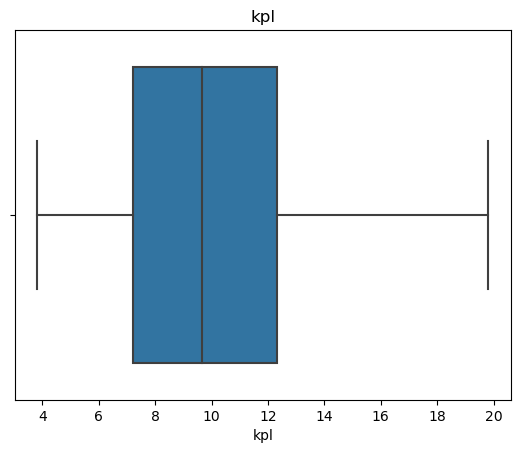

In [33]:
for i in num_cols:
    sns.boxplot(x=df1[i])
    plt.title(i)
    plt.show()

#### Inference
1) Accerlation and Horsepower contains some outliers

In [34]:
df1.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'kpl'],
      dtype='object')

C:\Users\neela\AppData\Local\Temp\ipykernel_7636\536700480.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df1['kpl'])


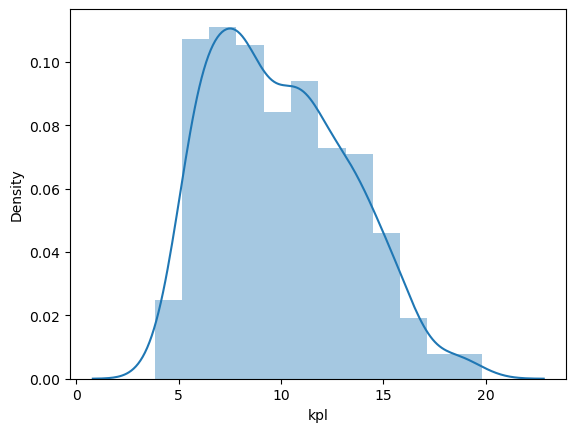

In [35]:
sns.distplot(df1['kpl'])
plt.show()

C:\Users\neela\AppData\Local\Temp\ipykernel_7636\916336559.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(np.log(df1['kpl']))


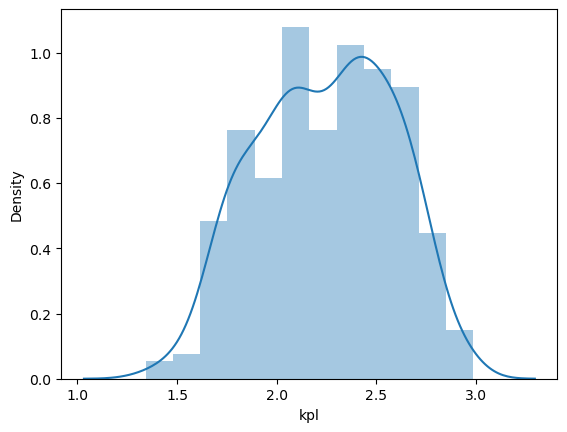

In [36]:
sns.distplot(np.log(df1['kpl']))
plt.show()

In [37]:
from scipy.stats import shapiro

In [38]:
print(shapiro(df1['kpl']))
print(shapiro(np.log(df1['kpl'])))

ShapiroResult(statistic=0.967171311378479, pvalue=1.0501380387495374e-07)
ShapiroResult(statistic=0.9816546440124512, pvalue=7.036902388790622e-05)


### Bivariate Analysis

In [39]:
# sns.pairplot(data=df1)
# plt.show()

#### Boxplots for mileage based on categorical columns

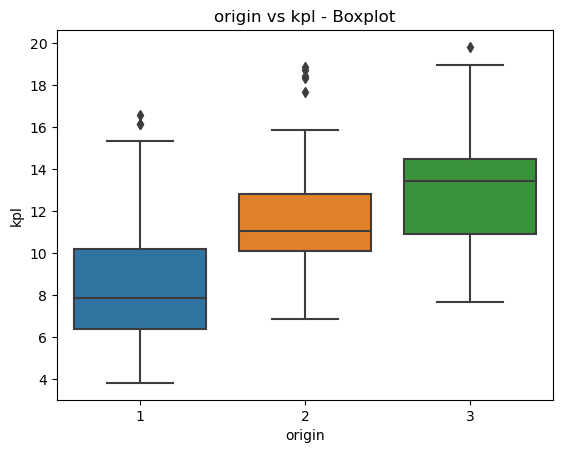

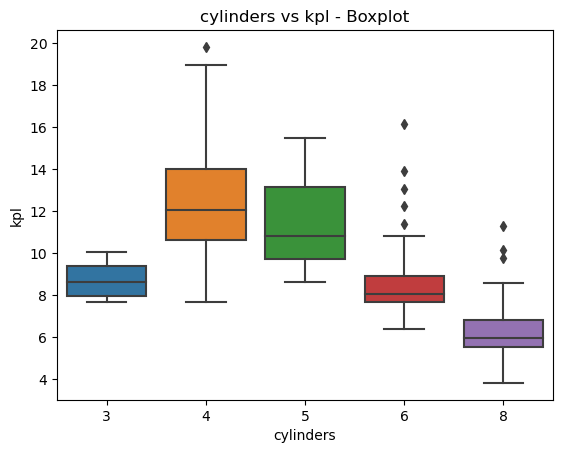

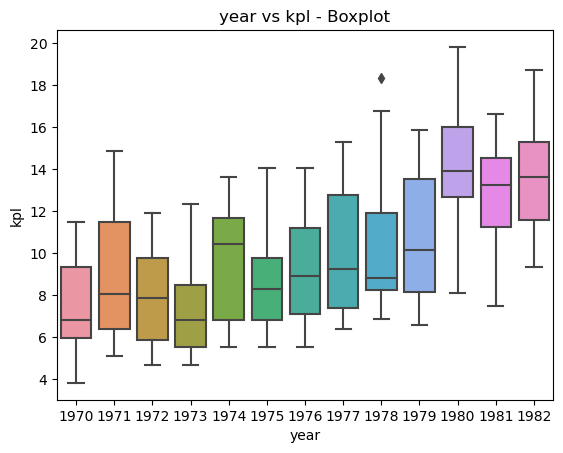

In [40]:
for i in ('origin','cylinders','year'):
    sns.boxplot(x=df1[i],y=df1['kpl'])
    plt.title(f'{i} vs kpl - Boxplot')
    plt.show()

#### Inference
1) Origin of the car affects the mileage.<br>
2) As Number of cylinder increases, the mileage decreases.<br>
3) Mileage increses in recent years<br>

#### Correlation

In [41]:
corr = df1.corr()
corr

,origin,cylinders,displacement,horsepower,weight,acceleration,year,kpl
origin,1.000000,-0.568932,-0.614535,-0.455171,-0.585005,0.212746,0.181528,0.565209
cylinders,-0.568932,1.000000,0.950823,0.842983,0.897527,-0.504683,-0.345647,-0.777618
displacement,-0.614535,0.950823,1.000000,0.897257,0.932994,-0.543800,-0.369855,-0.805127
horsepower,-0.455171,0.842983,0.897257,1.000000,0.864538,-0.689196,-0.416361,-0.778427
weight,-0.585005,0.897527,0.932994,0.864538,1.000000,-0.416839,-0.309120,-0.832244
acceleration,0.212746,-0.504683,-0.543800,-0.689196,-0.416839,1.000000,0.290316,0.423329
year,0.181528,-0.345647,-0.369855,-0.416361,-0.309120,0.290316,1.000000,0.580541
kpl,0.565209,-0.777618,-0.805127,-0.778427,-0.832244,0.423329,0.580541,1.000000


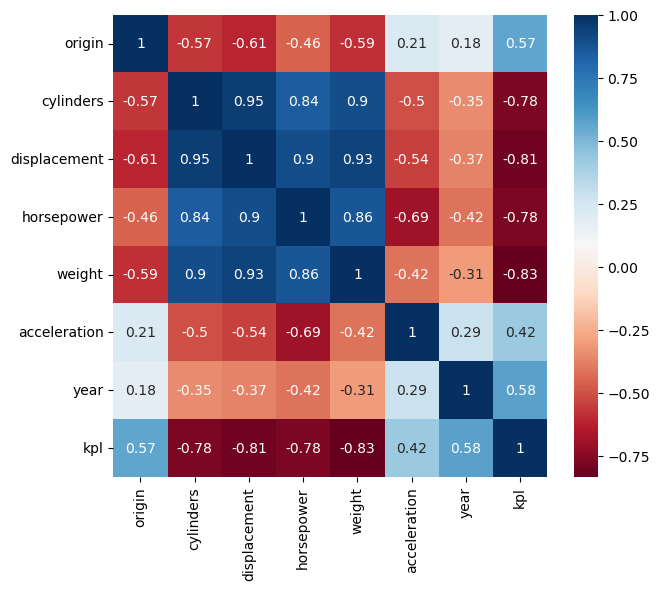

In [42]:
plt.figure(figsize=(7,6))
sns.heatmap(corr,annot=True,cmap='RdBu')
plt.show()

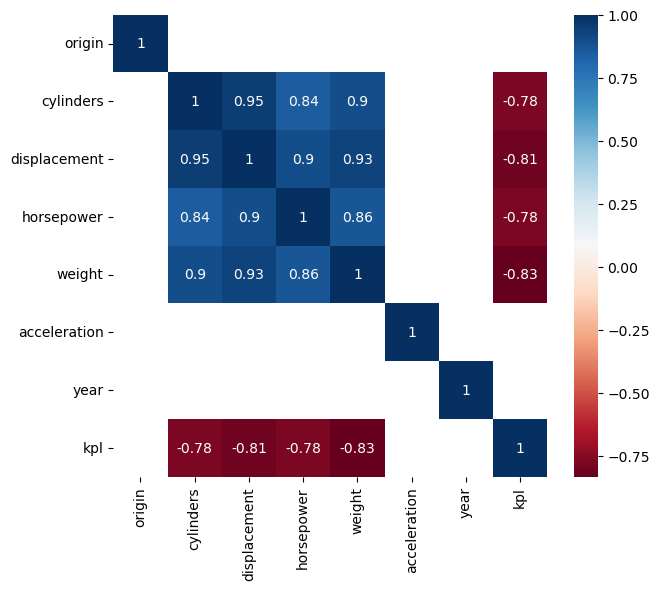

In [43]:
plt.figure(figsize=(7,6))
sns.heatmap(corr[abs(corr)>0.7],annot=True,cmap='RdBu')
plt.show()

In [44]:
### Multicollinearity exists between
# 1) horsepwoer and weight
# 2) horsepower and displacement
# 3) cylinder and horsepower
# 4) cylinder and weight
# 5) cylinder and displacement

### Outlier Treatment

In [45]:
df1.describe(percentiles=[0.01,0.02,0.03,0.05,0.75,0.95,0.97,0.98,0.99]).T

,count,mean,std,min,1%,2%,3%,5%,50%,75%,95%,97%,98%,99%,max
origin,392.0,1.576531,0.805518,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,3.000000,3.00000,3.000000,3.000000,3.000000
cylinders,392.0,5.471939,1.705783,3.000000,3.910000,4.000000,4.000000,4.000000,4.000000,8.000000,8.000000,8.00000,8.000000,8.000000,8.000000
displacement,392.0,194.411990,104.644004,68.000000,70.910000,77.640000,79.000000,85.000000,151.000000,275.750000,400.000000,400.00000,429.000000,441.260000,455.000000
horsepower,392.0,104.469388,38.491160,46.000000,48.000000,52.000000,53.730000,60.550000,93.500000,126.000000,180.000000,198.00000,210.900000,220.450000,230.000000
weight,392.0,2977.584184,849.402560,1613.000000,1771.830000,1800.000000,1834.730000,1931.600000,2803.500000,3614.750000,4464.000000,4654.81000,4732.540000,4951.090000,5140.000000
acceleration,392.0,15.541327,2.758864,8.000000,9.455000,10.000000,11.000000,11.255000,15.500000,17.025000,20.235000,21.00000,21.818000,22.317000,24.800000
year,392.0,1975.979592,3.683737,1970.000000,1970.000000,1970.000000,1970.000000,1970.000000,1976.000000,1979.000000,1982.000000,1982.00000,1982.000000,1982.000000,1982.000000
kpl,392.0,9.967885,3.318250,3.826293,4.676581,5.101724,5.101724,5.526868,9.672019,12.329168,15.730317,16.16694,16.857798,18.474195,19.811697


#### There are minimal outliers

In [46]:
df2 = df1.copy()

In [47]:
def outlier_treatment(x):
    x = x.clip(upper=x.quantile(0.99))
    y = x.clip(lower=x.quantile(0.01))
    return x


In [48]:
df1[['acceleration' , 'horsepower']] = df1[['acceleration','horsepower']].apply(outlier_treatment)

# Model Building

### 1) OLS Model

In [49]:
df1.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'kpl'],
      dtype='object')

In [50]:
df1.dtypes

origin            int64
cylinders         int64
displacement    float64
horsepower      float64
weight            int64
acceleration    float64
year              int64
kpl             float64
dtype: object

In [51]:
from statsmodels.formula.api import ols

In [52]:
ols_m1 = ols(formula='kpl ~ origin + cylinders + displacement + horsepower + \
            weight + acceleration + year',data=df1).fit()
print(ols_m1.summary())

                            OLS Regression Results                            
Dep. Variable:                    kpl   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     252.2
Date:                Thu, 15 Jun 2023   Prob (F-statistic):          2.34e-139
Time:                        15:43:38   Log-Likelihood:                -688.33
No. Observations:                 392   AIC:                             1393.
Df Residuals:                     384   BIC:                             1424.
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -611.6231     43.003    -14.223   

In [53]:
print(ols_m1.rsquared)
print(ols_m1.rsquared_adj)

0.821347915717041
0.8180912370972996


#### OLS model after removing acceleration 

In [54]:
ols_m2 = ols(formula='kpl ~ origin + cylinders + displacement + horsepower + \
            weight + year',data=df1).fit()
print(ols_m2.summary())

                            OLS Regression Results                            
Dep. Variable:                    kpl   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     294.8
Date:                Thu, 15 Jun 2023   Prob (F-statistic):          1.42e-140
Time:                        15:43:41   Log-Likelihood:                -688.42
No. Observations:                 392   AIC:                             1391.
Df Residuals:                     385   BIC:                             1419.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept     -609.7872     42.724    -14.273   

In [55]:
print(ols_m1.rsquared)
print(ols_m1.rsquared_adj)
print()
print(ols_m2.rsquared)
print(ols_m2.rsquared_adj)

0.821347915717041
0.8180912370972996

0.8212693679637935
0.818483955516476


In [56]:
print(ols_m1.f_pvalue)
print(ols_m2.f_pvalue)

2.3421589789557033e-139
1.4217541652036225e-140


#### Note
1) Removal of insignificant variables causes the adjusted R2 to increase.<br>
2) After removal of acceleration, Adjusted R2 has increased.<br>
3) Significance of model is determined by f_pvalue.<pre>
    a) If f_pvalue>0.05 => Model is not Significant
    b) If f_pvalue<=0.05 => Model is Significant</pre>

In [57]:
import statsmodels.api as sm

In [58]:
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]
print(x.shape,y.shape)
print(type(y))

(392, 7) (392,)
<class 'pandas.core.series.Series'>


In [59]:
x = sm.add_constant(x)       # adding a constant
model1 = sm.OLS(np.log(y),x).fit()

print(model1.summary())

                            OLS Regression Results                            
Dep. Variable:                    kpl   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     401.5
Date:                Thu, 15 Jun 2023   Prob (F-statistic):          2.51e-172
Time:                        15:43:55   Log-Likelihood:                 282.37
No. Observations:                 392   AIC:                            -548.7
Df Residuals:                     384   BIC:                            -517.0
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -55.0630      3.615    -15.233   

In [60]:
df1.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'kpl'],
      dtype='object')

#### OLS model with log(y) as dependent variable and acceleration removed from independent features

In [61]:
x2 = df1.iloc[:,[0,1,2,3,4,6]]
print(x2.columns)
y2 = df1.iloc[:,-1]
print(x2.shape,y2.shape)
print(type(y2))

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight', 'year'], dtype='object')
(392, 6) (392,)
<class 'pandas.core.series.Series'>


In [62]:
x2 = sm.add_constant(x2)  # adding a constant
model2 = sm.OLS(np.log(y2),x2).fit()

print(model2.summary())

                            OLS Regression Results                            
Dep. Variable:                    kpl   R-squared:                       0.880
Model:                            OLS   Adj. R-squared:                  0.878
Method:                 Least Squares   F-statistic:                     468.9
Date:                Thu, 15 Jun 2023   Prob (F-statistic):          1.48e-173
Time:                        15:44:11   Log-Likelihood:                 282.08
No. Observations:                 392   AIC:                            -550.2
Df Residuals:                     385   BIC:                            -522.4
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -55.3469      3.593    -15.404   

In [63]:
print(model1.rsquared_adj)
print(model2.rsquared_adj)

0.8776082600918149
0.8777444316743389


### 2) LinearRegression

In [64]:
df1.head()

,origin,cylinders,displacement,horsepower,weight,acceleration,year,kpl
0,1,8,307.0,130.0,3504,12.0,1970,7.652587
1,1,8,350.0,165.0,3693,11.5,1970,6.377156
2,1,8,318.0,150.0,3436,11.0,1970,7.652587
3,1,8,304.0,150.0,3433,12.0,1970,6.802299
4,1,8,302.0,140.0,3449,10.5,1970,7.227443


In [65]:
# selecting all features
x = df1.iloc[:,:-1]
y = df1.iloc[:,-1]
print(x.shape,y.shape)
print(type(y))

(392, 7) (392,)
<class 'pandas.core.series.Series'>


In [66]:
from sklearn.model_selection import train_test_split

#### Without Log Transformation

In [67]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.30,random_state=42)
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(274, 7)
(118, 7)
(274,)
(118,)


In [68]:
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [69]:
def eval_model(ytest,ypred):
    mae = mean_absolute_error(ytest,ypred)
    mse = mean_squared_error(ytest,ypred)
    rmse = np.sqrt(mse)
    r2s = r2_score(ytest,ypred)
    print('MAE',mae)
    print('MSE',mse)
    print('RMSE',rmse)
    print('R2_Score',r2s)

In [70]:
from sklearn.linear_model import LinearRegression

In [71]:
lr1 = LinearRegression()
lr1.fit(x_train,y_train)

LinearRegression()

In [72]:
print('Train score',lr1.score(x_train,y_train))
print('Test score',lr1.score(x_test,y_test))

Train score 0.8222439354664096
Test score 0.8087521846999318


In [73]:
ypred_lr1 = lr1.predict(x_test)
eval_model(y_test,ypred_lr1)

MAE 1.0397111815305227
MSE 1.8287877969127415
RMSE 1.35232680847225
R2_Score 0.8087521846999318


#### LinearReg With Log Transformation

In [74]:
x_train1,x_test1,y_train1,y_test1 = train_test_split(x,np.log(y),test_size=0.30,random_state=42)
print(x_train1.shape)
print(x_test1.shape)
print(y_train1.shape)
print(y_test1.shape)

(274, 7)
(118, 7)
(274,)
(118,)


In [75]:
lr2 = LinearRegression()
lr2.fit(x_train1,y_train1)

LinearRegression()

In [76]:
print('Train score',lr2.score(x_train1,y_train1))
print('Test score',lr2.score(x_test1,y_test1))

Train score 0.8806202824970913
Test score 0.8713605519488116


In [77]:
ypred_lr2 = lr2.predict(x_test1)
eval_model(y_test1,ypred_lr2)

MAE 0.08620248173334223
MSE 0.013274609037650448
RMSE 0.11521548957345297
R2_Score 0.8713605519488116


#### Linear Reg without acceleration

In [78]:
df1.columns

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year', 'kpl'],
      dtype='object')

In [79]:
x3 = df1.iloc[:,[0,1,2,3,4,6]]
y3 = df1.iloc[:,-1]
print(x3.columns)
print(x3.shape,y3.shape)
print(type(x3),type(y3))

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight', 'year'], dtype='object')
(392, 6) (392,)
<class 'pandas.core.frame.DataFrame'> <class 'pandas.core.series.Series'>


In [80]:
x_train3,x_test3,y_train3,y_test3 = train_test_split(x3,y3,test_size=0.30,random_state=42)
print(x_train3.shape)
print(x_test3.shape)
print(y_train3.shape)
print(y_test3.shape)

(274, 6)
(118, 6)
(274,)
(118,)


In [81]:
lr3 = LinearRegression()
lr3.fit(x_train3,y_train3)

LinearRegression()

In [82]:
print('Train score',lr3.score(x_train3,y_train3))
print('Test score',lr3.score(x_test3,y_test3))

Train score 0.8222327332919723
Test score 0.8085217149831021


In [83]:
print('Train score',lr1.score(x_train,y_train))
print('Test score',lr1.score(x_test,y_test))

Train score 0.8222439354664096
Test score 0.8087521846999318


In [85]:
ypred_lr3 = lr3.predict(x_test3)
eval_model(y_test3,ypred_lr3)

MAE 1.0403915641786532
MSE 1.830991640156832
RMSE 1.3531413969562944
R2_Score 0.8085217149831021


### Cross Validation on LinearRegression

In [86]:
from sklearn.model_selection import cross_val_score, KFold

In [89]:
print(x.columns)
print(y[:5])

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year'],
      dtype='object')
0    7.652587
1    6.377156
2    7.652587
3    6.802299
4    7.227443
Name: kpl, dtype: float64


In [90]:
lr_model = LinearRegression()
kfold = KFold(n_splits=12)
cvs = cross_val_score(lr_model,x,y,cv=kfold,scoring='r2')
print(cvs)
print(np.mean(cvs))

[0.67355881 0.7506044  0.80182005 0.55277898 0.73156336 0.84654446
 0.83474844 0.70389406 0.55564372 0.13762907 0.53023485 0.54052172]
0.6382951605259363


### Inference
1) Model is genertaing +80% R2 only at a particular split. Linear Reg model is not robust.

### 4) Ridge Regression
Applied on features on which first LinearReg model was trained

In [91]:
from sklearn.linear_model import Ridge

In [92]:
ridge1 = Ridge(alpha=1)  # alpha represents the lambda from the cost function of Ridge Reg 
# alpha is the hyperparameter
ridge1.fit(x_train,y_train)

Ridge(alpha=1)

In [93]:
print('Train score Ridge',ridge1.score(x_train,y_train))
print('Test score Ridge',ridge1.score(x_test,y_test))

Train score Ridge 0.822242147005201
Test score Ridge 0.8088843603305278


In [94]:
print('Train score LinReg',lr1.score(x_train,y_train))
print('Test score LinReg',lr1.score(x_test,y_test))

Train score LinReg 0.8222439354664096
Test score LinReg 0.8087521846999318


In [95]:
print(lr1.coef_)
print(ridge1.coef_)

[ 0.7149156  -0.15082489  0.00662795 -0.01339911 -0.00250655  0.00670438
  0.31439032]
[ 0.70764639 -0.14760252  0.00652803 -0.01332428 -0.00250809  0.00677838
  0.314231  ]


In [96]:
ypred_ridge1 = ridge1.predict(x_test)
eval_model(y_test,ypred_ridge1)

MAE 1.0397655759139677
MSE 1.827523880878439
RMSE 1.3518594160926791
R2_Score 0.8088843603305278


### Determining alpha with RidgeCV

In [97]:
from sklearn.linear_model import RidgeCV

In [98]:
ridge2 = RidgeCV(alphas=np.arange(0.1,1,0.01),
                 cv=20,scoring='r2')
ridge2.fit(x,y)

RidgeCV(alphas=array([0.1 , 0.11, 0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 ,
       0.21, 0.22, 0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31,
       0.32, 0.33, 0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42,
       0.43, 0.44, 0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53,
       0.54, 0.55, 0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64,
       0.65, 0.66, 0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75,
       0.76, 0.77, 0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86,
       0.87, 0.88, 0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97,
       0.98, 0.99]),
        cv=20, scoring='r2')

In [104]:
ypred_ridge2 = ridge2.predict(x_test)
print(ridge2.score(x_test,y_test))

0.8240408870321821


In [105]:
print(ridge2.alpha_)

0.9899999999999995


In [106]:
ypred_ridge2 = ridge2.predict(x_test)
eval_model(y_test,ypred_ridge2)

MAE 0.9805762848078629
MSE 1.6825911346816895
RMSE 1.2971473064697354
R2_Score 0.8240408870321821


In [107]:
eval_model(y_test,ypred_ridge1)

MAE 1.0397655759139677
MSE 1.827523880878439
RMSE 1.3518594160926791
R2_Score 0.8088843603305278


In [108]:
eval_model(y_test,ypred_lr1)

MAE 1.0397111815305227
MSE 1.8287877969127415
RMSE 1.35232680847225
R2_Score 0.8087521846999318


## Lasso Reg

In [109]:
from sklearn.linear_model import Lasso

In [110]:
lasso1 = Lasso(alpha=1)  # alpha represents the lambda from the cost function of Lasso Reg 
# alpha is the hyperparameter
lasso1.fit(x_train,y_train)

Lasso(alpha=1)

In [111]:
print('Train score Lasso',lasso1.score(x_train,y_train))
print('Test score Lasso',lasso1.score(x_test,y_test))

Train score Lasso 0.7981362246817996
Test score Lasso 0.7876579124023022


In [112]:
print(x.columns)

Index(['origin', 'cylinders', 'displacement', 'horsepower', 'weight',
       'acceleration', 'year'],
      dtype='object')


In [113]:
print(lr1.coef_)
print(ridge1.coef_)
print(lasso1.coef_)

[ 0.7149156  -0.15082489  0.00662795 -0.01339911 -0.00250655  0.00670438
  0.31439032]
[ 0.70764639 -0.14760252  0.00652803 -0.01332428 -0.00250809  0.00677838
  0.314231  ]
[ 0.         -0.         -0.00170942 -0.00896815 -0.00254796  0.
  0.21540453]


In [114]:
ypred_lasso1 = lasso1.predict(x_test)
eval_model(y_test,ypred_lasso1)

MAE 1.1454926543394106
MSE 2.0304996319061623
RMSE 1.4249560105161712
R2_Score 0.7876579124023022


### LassoCV

In [115]:
from sklearn.linear_model import LassoCV

In [116]:
lasso2 = LassoCV(alphas=np.arange(0.01,1,0.01),cv=20)
lasso2.fit(x,y)

LassoCV(alphas=array([0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1 , 0.11,
       0.12, 0.13, 0.14, 0.15, 0.16, 0.17, 0.18, 0.19, 0.2 , 0.21, 0.22,
       0.23, 0.24, 0.25, 0.26, 0.27, 0.28, 0.29, 0.3 , 0.31, 0.32, 0.33,
       0.34, 0.35, 0.36, 0.37, 0.38, 0.39, 0.4 , 0.41, 0.42, 0.43, 0.44,
       0.45, 0.46, 0.47, 0.48, 0.49, 0.5 , 0.51, 0.52, 0.53, 0.54, 0.55,
       0.56, 0.57, 0.58, 0.59, 0.6 , 0.61, 0.62, 0.63, 0.64, 0.65, 0.66,
       0.67, 0.68, 0.69, 0.7 , 0.71, 0.72, 0.73, 0.74, 0.75, 0.76, 0.77,
       0.78, 0.79, 0.8 , 0.81, 0.82, 0.83, 0.84, 0.85, 0.86, 0.87, 0.88,
       0.89, 0.9 , 0.91, 0.92, 0.93, 0.94, 0.95, 0.96, 0.97, 0.98, 0.99]),
        cv=20)

In [117]:
print(lasso2.alpha_)

0.01


In [119]:
ypred_lasso2 = lasso2.predict(x_test)
print(lasso2.score(x_test,y_test))
print(ridge2.score(x_test,y_test))

0.8242368037513547
0.8240408870321821


In [113]:
print(lasso1.coef_)
print(lasso2.coef_)

[ 0.         -0.         -0.00170942 -0.00896815 -0.00254796  0.
  0.21540453]
[ 0.57756873 -0.17155907  0.0074881  -0.00874537 -0.0026952   0.01482541
  0.31733511]


In [ ]:
### OLS -> remove insig features
#### Lin reg -> if overfit
#### Ridge or Lasso, RidgeCV and Lasso CV